<a href="https://colab.research.google.com/github/Abubaker-khilji/Predicting-Well-Productivity/blob/main/oil_field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm

In [ ]:
file = pd.read_csv('data.csv')

In [ ]:
file.head(5)

,Lease,Formation/Reservoir,Reservoir Temperature (deg F),Net Pay (ft),Wellbore Diameter (ft),Porosity,Water Saturation,Oil Saturation,Gas Saturation,Gas Specific Gravity,...,TVD (ft),# Stages,# Clusters,# Clusters per Stage,# of Total Proppant (Lbs),Lateral Length (ft),Top Perf (ft),Bottom Perf (ft),Sandface Temp (deg F),Static Wellhead Temp (deg F)
0,OSPREY,EAGLE FORD,225,78,0.7,0.063,0.260,0.740,0.0,0.9513,...,7638.6000,28,252,9.0,13514540.0,5883,8030,13913,225.0,70.0
1,FALCON,EAGLE FORD,225,66,0.7,0.063,0.270,0.730,0.0,0.9936,...,7501.8758,64,960,15.0,35970960.0,9997,7828,17825,225.0,60.0
2,HAWK,EAGLE FORD,225,67,0.7,0.063,0.271,0.729,0.0,0.9936,...,7516.6753,68,1020,15.0,38064782.0,10672,7824,18496,225.0,60.0
3,EAGLE,EAGLE FORD,235,74,0.7,0.063,0.270,0.730,0.0,0.9200,...,7890.8100,50,450,9.0,25267400.0,7481,7958,15439,234.0,60.0
4,KITE,EAGLE FORD,238,56,0.7,0.050,0.321,0.679,0.0,0.7200,...,8846.8300,34,306,9.0,18554774.0,5086,9388,14474,235.0,65.0


In [ ]:
file.describe()

,Reservoir Temperature (deg F),Net Pay (ft),Wellbore Diameter (ft),Porosity,Water Saturation,Oil Saturation,Gas Saturation,Gas Specific Gravity,CO2,H2S,...,TVD (ft),# Stages,# Clusters,# Clusters per Stage,# of Total Proppant (Lbs),Lateral Length (ft),Top Perf (ft),Bottom Perf (ft),Sandface Temp (deg F),Static Wellhead Temp (deg F)
count,53.000000,53.000000,5.300000e+01,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,...,53.000000,53.000000,53.000000,53.000000,5.300000e+01,53.000000,53.000000,53.000000,53.000000,53.000000
mean,211.867925,157.830189,7.000000e-01,0.069975,0.300292,0.141591,0.558117,0.632104,0.011787,0.0,...,8951.992571,46.415094,317.698113,6.583208,2.150203e+07,8019.075472,9133.905660,17136.566038,210.388062,94.067925
std,90.743306,59.686597,1.120847e-16,0.013347,0.085137,0.279971,0.298433,0.123978,0.017639,0.0,...,2118.391195,20.147947,231.010122,2.954808,9.572924e+06,2371.435964,2179.193484,3521.258699,88.773573,48.508345
min,115.000000,56.000000,7.000000e-01,0.050000,0.183800,0.000000,0.000000,0.570000,0.000000,0.0,...,5707.639000,7.000000,49.000000,3.000000,3.591544e+06,2268.000000,5900.000000,10049.000000,115.000000,60.000000
25%,134.000000,134.000000,7.000000e-01,0.060300,0.210000,0.000000,0.564100,0.570000,0.000000,0.0,...,7441.235000,31.000000,141.000000,5.000000,1.416337e+07,6098.000000,7550.000000,14474.000000,134.000000,60.000000
50%,146.000000,164.000000,7.000000e-01,0.067200,0.309300,0.000000,0.651600,0.570000,0.000000,0.0,...,7698.570000,48.000000,235.000000,5.000000,2.083679e+07,7574.000000,8030.000000,16226.000000,143.366600,80.000000
75%,305.000000,208.000000,7.000000e-01,0.083900,0.361000,0.000000,0.790000,0.598000,0.024500,0.0,...,11675.933900,64.000000,450.000000,7.000000,2.669545e+07,9856.000000,11902.000000,19959.000000,300.000000,120.000000
max,379.000000,268.000000,7.000000e-01,0.100000,0.470000,0.740000,0.816200,0.993600,0.058000,0.0,...,12668.000000,89.000000,1035.000000,15.000000,4.294695e+07,13011.000000,13153.000000,23203.000000,379.000000,236.000000


<Axes: xlabel='Net Pay (ft)', ylabel='Density'>

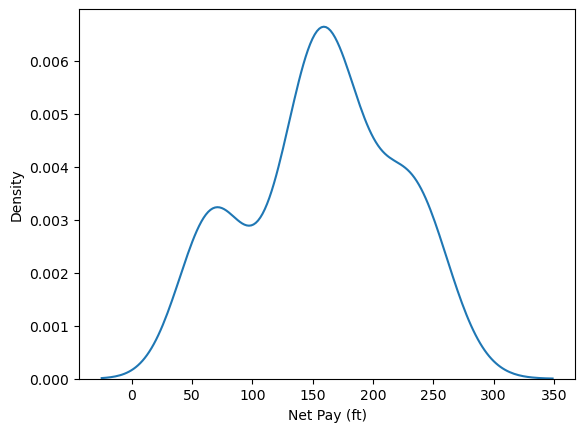

In [ ]:
sns.kdeplot(file["Net Pay (ft)"])

In [ ]:
file.isnull().sum()

Lease                            0
Formation/Reservoir              0
Reservoir Temperature (deg F)    0
Net Pay (ft)                     0
Wellbore Diameter (ft)           0
Porosity                         0
Water Saturation                 0
Oil Saturation                   0
Gas Saturation                   0
Gas Specific Gravity             0
CO2                              0
H2S                              0
N2                               0
Condensate Gravity (API)         0
Sep. Temperature (deg F)         0
Sep. Pressure (psi)              0
Oil Gravity (API)                0
TVD (ft)                         0
# Stages                         0
# Clusters                       0
# Clusters per Stage             0
# of Total Proppant (Lbs)        0
Lateral Length (ft)              0
Top Perf (ft)                    0
Bottom Perf (ft)                 0
Sandface Temp (deg F)            0
Static Wellhead Temp (deg F)     0
dtype: int64

In [ ]:
file.dtypes

Lease                             object
Formation/Reservoir               object
Reservoir Temperature (deg F)      int64
Net Pay (ft)                       int64
Wellbore Diameter (ft)           float64
Porosity                         float64
Water Saturation                 float64
Oil Saturation                   float64
Gas Saturation                   float64
Gas Specific Gravity             float64
CO2                              float64
H2S                              float64
N2                               float64
Condensate Gravity (API)         float64
Sep. Temperature (deg F)           int64
Sep. Pressure (psi)                int64
Oil Gravity (API)                float64
TVD (ft)                         float64
# Stages                           int64
# Clusters                         int64
# Clusters per Stage             float64
# of Total Proppant (Lbs)        float64
Lateral Length (ft)                int64
Top Perf (ft)                      int64
Bottom Perf (ft)

# trying to check do any feature is normal distrubution
But first i need to peroform some necessary actions
* filter numeric columns
* ensure the number of columns per row is fixed to 3
* calculate the number of rows based on 3 columns per row
* adjust the height based on the number of rows
* loop through each numeric column and create a subplot for each

In [ ]:
numeric_columns = [column for column in file.columns if file[column].dtype in ['float64', 'int64']]

In [ ]:
cols = 3
rows = math.ceil(len(numeric_columns) / cols)

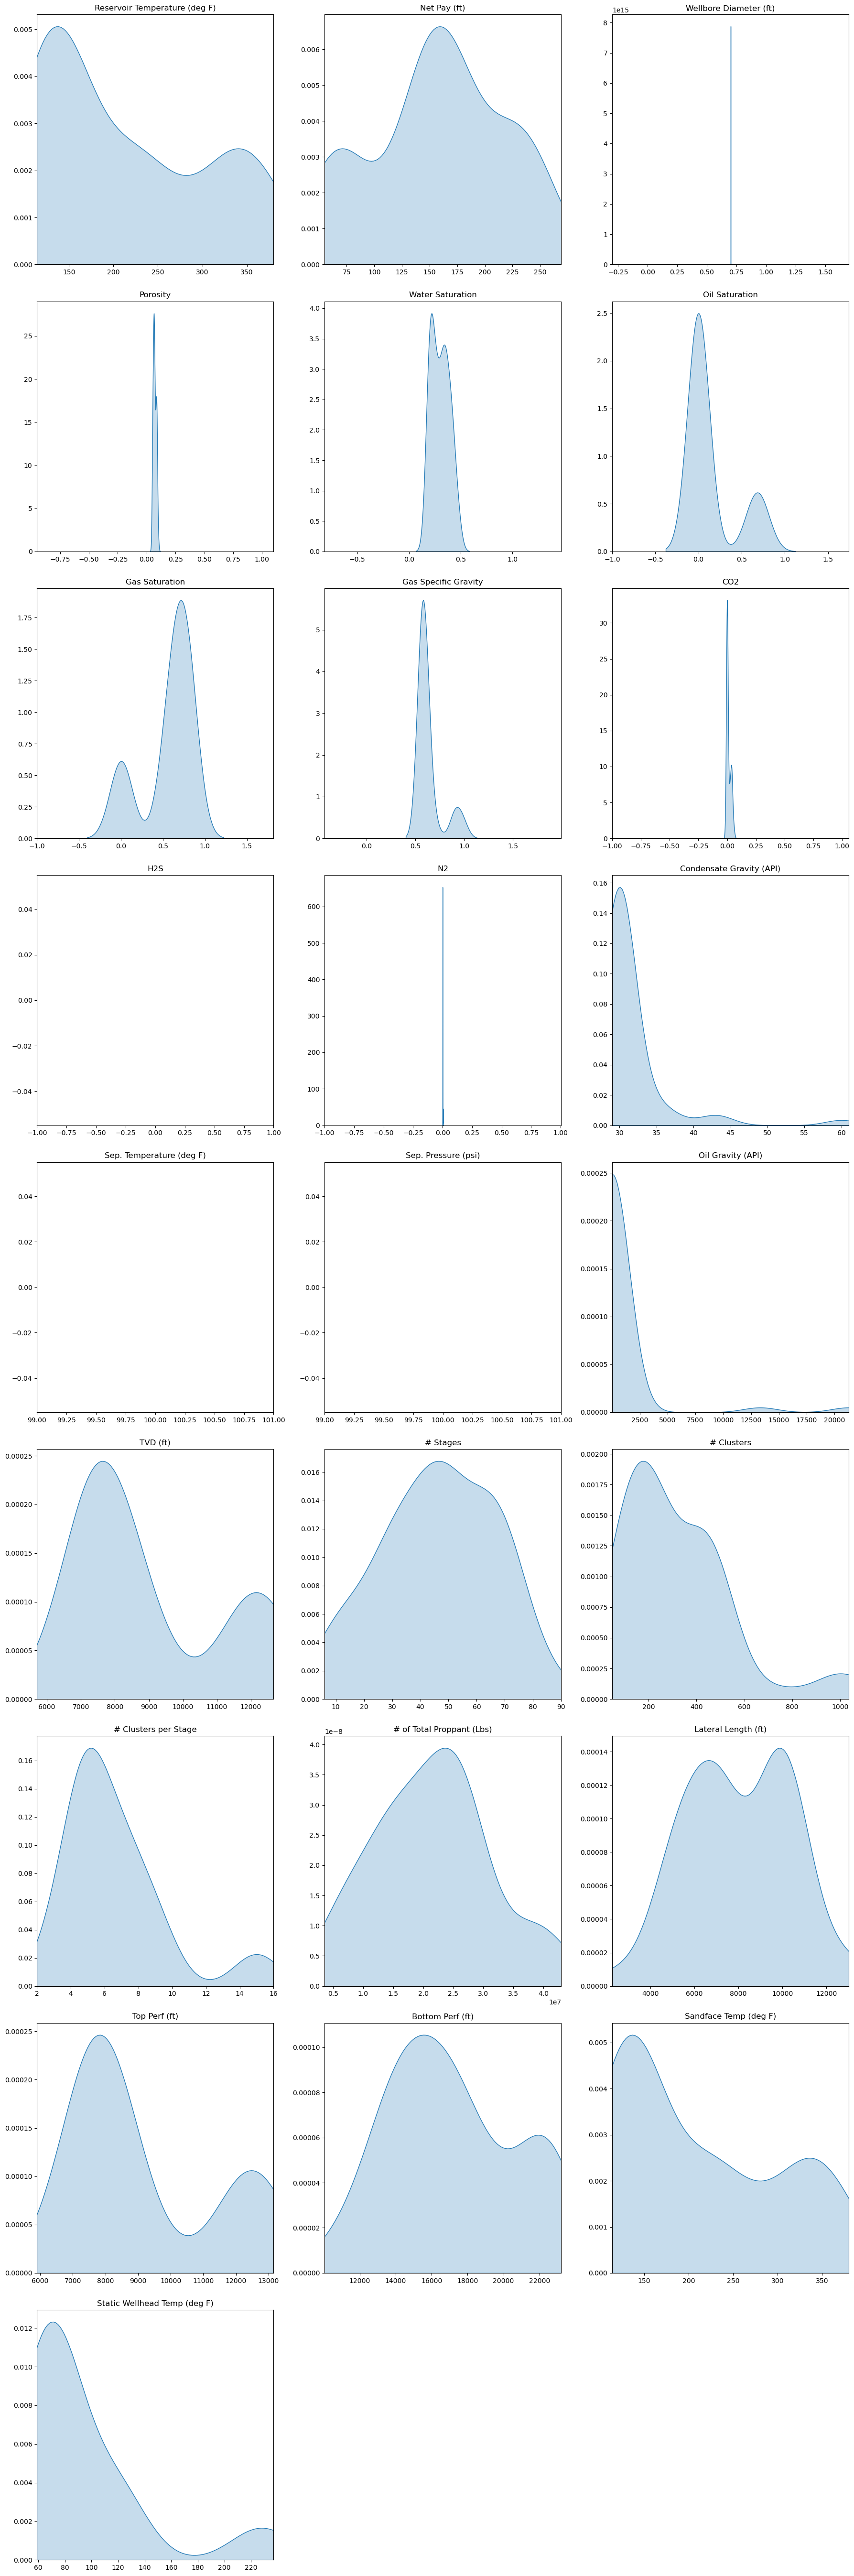

In [ ]:
plt.figure(figsize=(18, rows * 6))
for i, column in enumerate(numeric_columns):
    plt.subplot(rows, cols, i + 1)  # seting the position of the subplot
    sns.kdeplot(file[column], fill=True , warn_singular=False)
    plt.title(f'{column}')
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim([file[column].min() - 1, file[column].max() + 1])  # adjust x-axis limits for better visualization
plt.tight_layout()
plt.show()